In [2]:
import numpy as np
import pandas as pd
import os
import pathlib as Path
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import requests
from police_api import PoliceAPI

api = PoliceAPI()

px.set_mapbox_access_token("pk.eyJ1IjoibXJhZmlwaCIsImEiOiJjbGMzdWZ0MTIwNmt5M3B0ODNnbzF1a3d2In0.7VgLitY9OXxhPSxlxJglfQ")

In [3]:
df_out_2023_03 = pd.read_csv(r'.\\Datasets\\2022-2023\\2023-03\\2023-03-metropolitan-outcomes.csv')
df_ss_2023_03 = pd.read_csv(r'.\\Datasets\\2022-2023\\2023-03\\2023-03-metropolitan-stop-and-search.csv')
df_street_2011_02 = pd.read_csv(r'.\\Datasets\\2010-2017\\2011-02\\2011-02-metropolitan-street.csv')
df_street_2011_02[df_street_2011_02['Crime type'] == 'Burglary'].head()


,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
25,NaN,2011-02,Metropolitan Police Service,Metropolitan Police Service,0.128330,51.584559,On or near Nash Road,E01000028,Barking and Dagenham 001B,Burglary,NaN,NaN
26,NaN,2011-02,Metropolitan Police Service,Metropolitan Police Service,0.126964,51.586508,On or near Rowan Way,E01000028,Barking and Dagenham 001B,Burglary,NaN,NaN
27,NaN,2011-02,Metropolitan Police Service,Metropolitan Police Service,0.129225,51.583922,On or near Gregory Road,E01000028,Barking and Dagenham 001B,Burglary,NaN,NaN
28,NaN,2011-02,Metropolitan Police Service,Metropolitan Police Service,0.131680,51.586432,On or near Newhouse Avenue,E01000028,Barking and Dagenham 001B,Burglary,NaN,NaN
38,NaN,2011-02,Metropolitan Police Service,Metropolitan Police Service,0.139479,51.579743,On or near Yew Tree Gardens,E01000029,Barking and Dagenham 001C,Burglary,NaN,NaN


In [4]:
def fast_scandir(dirname):
    subfolders= [f.path for f in os.scandir(dirname) if f.is_dir()]
    for dirname in list(subfolders):
        subfolders.extend(fast_scandir(dirname))
    return subfolders

subfolders = fast_scandir(r'./Datasets')

In [5]:
all_street_df = []
all_ss_df = []
all_outcome_df = []
for i in range(4, len(subfolders)):
    street_file_name =  [ file for file in os.listdir(subfolders[i]) if "street" in file]
    ss_file_name = [ file for file in os.listdir(subfolders[i]) if "search" in file]
    outcome_file_name = [ file for file in os.listdir(subfolders[i]) if "outcome" in file]
    if len(street_file_name) > 0:
        df = pd.read_csv(os.path.join(subfolders[i], street_file_name[0]))
        all_street_df.append(df)
    elif len(ss_file_name) > 0:
        df = pd.read_csv(os.path.join(subfolders[i], ss_file_name[0]))
        all_ss_df.append(df)
    if len(outcome_file_name) > 0:
        df = pd.read_csv(os.path.join(subfolders[i], outcome_file_name[0]))
        all_outcome_df.append(df)

In [6]:
street_all_years = pd.concat(all_street_df, ignore_index=True)
df_clean = street_all_years.drop(columns=['Context'])
df_clean['Month']= pd.to_datetime(df_clean['Month'])
df_clean['Year'] = df_clean['Month'].dt.year
df_clean = df_clean.rename(columns={'Month': 'Date'})
df_clean['Month'] = df_clean['Date'].dt.month
burglary_data = df_clean.loc[(df_clean['Crime type'] == 'Burglary') & (df_clean['LSOA name'].str.contains("Barnet"))]
burglary_data.head()


,Crime ID,Date,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Year,Month
2051,NaN,2010-12-01,Metropolitan Police Service,Metropolitan Police Service,-0.201877,51.655538,On or near High Street,E01000248,Barnet 001A,Burglary,NaN,2010,12
2052,NaN,2010-12-01,Metropolitan Police Service,Metropolitan Police Service,-0.207853,51.654317,On or near The Avenue,E01000248,Barnet 001A,Burglary,NaN,2010,12
2053,NaN,2010-12-01,Metropolitan Police Service,Metropolitan Police Service,-0.202510,51.656348,On or near Bruce Road,E01000248,Barnet 001A,Burglary,NaN,2010,12
2054,NaN,2010-12-01,Metropolitan Police Service,Metropolitan Police Service,-0.206779,51.654768,On or near The Drive,E01000248,Barnet 001A,Burglary,NaN,2010,12
2071,NaN,2010-12-01,Metropolitan Police Service,Metropolitan Police Service,-0.209537,51.655223,On or near Marriott Road,E01000249,Barnet 001B,Burglary,NaN,2010,12


In [7]:
burglary_data[burglary_data['Year']==2010]

,Crime ID,Date,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Year,Month
2051,NaN,2010-12-01,Metropolitan Police Service,Metropolitan Police Service,-0.201877,51.655538,On or near High Street,E01000248,Barnet 001A,Burglary,NaN,2010,12
2052,NaN,2010-12-01,Metropolitan Police Service,Metropolitan Police Service,-0.207853,51.654317,On or near The Avenue,E01000248,Barnet 001A,Burglary,NaN,2010,12
2053,NaN,2010-12-01,Metropolitan Police Service,Metropolitan Police Service,-0.202510,51.656348,On or near Bruce Road,E01000248,Barnet 001A,Burglary,NaN,2010,12
2054,NaN,2010-12-01,Metropolitan Police Service,Metropolitan Police Service,-0.206779,51.654768,On or near The Drive,E01000248,Barnet 001A,Burglary,NaN,2010,12
2071,NaN,2010-12-01,Metropolitan Police Service,Metropolitan Police Service,-0.209537,51.655223,On or near Marriott Road,E01000249,Barnet 001B,Burglary,NaN,2010,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4981,NaN,2010-12-01,Metropolitan Police Service,Metropolitan Police Service,-0.203850,51.560223,On or near Hocroft Avenue,E01000139,Barnet 041B,Burglary,NaN,2010,12
4982,NaN,2010-12-01,Metropolitan Police Service,Metropolitan Police Service,-0.198901,51.562422,On or near Ridge Road,E01000139,Barnet 041B,Burglary,NaN,2010,12
4983,NaN,2010-12-01,Metropolitan Police Service,Metropolitan Police Service,-0.198460,51.562640,On or near Sunnyside,E01000139,Barnet 041B,Burglary,NaN,2010,12
4996,NaN,2010-12-01,Metropolitan Police Service,Metropolitan Police Service,-0.197100,51.563105,On or near Finchley Road,E01000140,Barnet 041C,Burglary,NaN,2010,12


In [8]:
fig = ff.create_hexbin_mapbox(
            data_frame=burglary_data, lat="Latitude", lon="Longitude",
            opacity=1.0, labels={"color": "Point Count"},
            min_count=1, zoom=10, show_original_data=True
        )
fig.update_layout(margin=dict(b=0, t=0, l=0, r=0))
fig.show()

In [9]:
burglary_data = burglary_data.loc[(burglary_data['Year'] != 2020) | (burglary_data['Year'] != 2021)]
df_training = burglary_data.loc[(burglary_data['Year'] != 2022) | (burglary_data['Year'] != 2023)]
df_val = burglary_data.loc[(burglary_data['Year'] == 2022) | (burglary_data['Year'] == 2023)]
training_grouped = df_training.groupby(['Date']).count()
validation_grouped = df_val.groupby(['Date']).count()

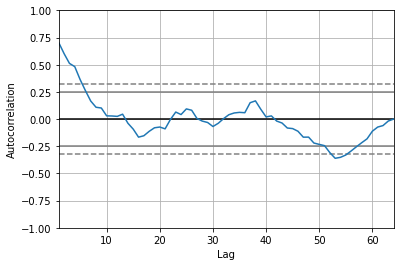

In [10]:
import matplotlib.pyplot as plt

s = training_grouped['Location']

# Creating Autocorrelation plot
x = pd.plotting.autocorrelation_plot(s)
 
# plotting the Curve
x.plot()
 
# Display
plt.show()

<AxesSubplot: xlabel='Date'>

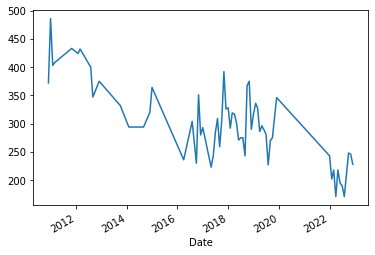

In [11]:
# Growth of burglaries over the years
s.plot()

p-value: 0.0710197119050112


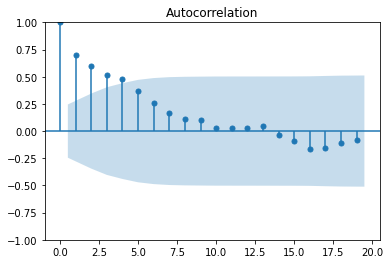

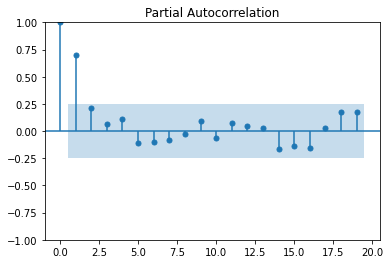

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# ADF test to see stationarity
adf_test = adfuller(training_grouped[['Location']])
# When p <= 0.05, then data is stationary
print(f'p-value: {adf_test[1]}')
# Compute autocorrelation
acf = plot_acf(training_grouped[['Location']])

# Compute partial autocorrelation function
pacf = plot_pacf(training_grouped[['Location']])

# any line inside the blue area shouldn't be considered.


In [13]:
df_train_diff = training_grouped.diff().dropna()
df_train_diff.head()

,Crime ID,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Year,Month
Date,,,,,,,,,,,,
2011-01-01,0.0,114.0,114.0,114.0,114.0,114.0,114.0,114.0,114.0,0.0,114.0,114.0
2011-02-01,0.0,-83.0,-83.0,-83.0,-83.0,-83.0,-83.0,-83.0,-83.0,0.0,-83.0,-83.0
2011-03-01,0.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,5.0,5.0
2011-11-01,0.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,0.0,25.0,25.0
2012-02-01,424.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,424.0,-9.0,-9.0


p-value: 1.4057110130215475e-09


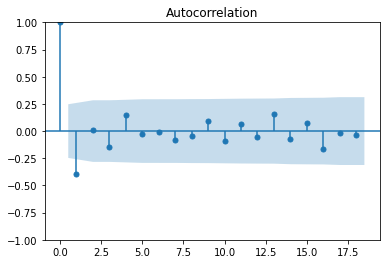

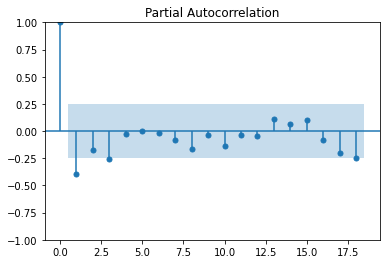

In [14]:
# ADF test to see stationarity
adf_test_new = adfuller(df_train_diff[['Location']])
# When p <= 0.05, then data is stationary
print(f'p-value: {adf_test_new[1]}')
# Compute autocorrelation
acf = plot_acf(df_train_diff[['Location']])

# Compute partial autocorrelation function
pacf = plot_pacf(df_train_diff[['Location']])

In [15]:
from statsmodels.tsa.arima.model import ARIMA
# fit model
model = ARIMA(df_train_diff['Location'], order=(3,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               Location   No. Observations:                   63
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -335.829
Date:                Tue, 20 Jun 2023   AIC                            679.657
Time:                        12:04:29   BIC                            688.166
Sample:                             0   HQIC                           682.998
                                 - 63                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0569      0.145     -7.299      0.000      -1.341      -0.773
ar.L2         -0.7707      0.161     -4.775      0.000      -1.087      -0.454
ar.L3         -0.4532      0.134     -3.374      0.0

c:\Users\Rafi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\Rafi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\Rafi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



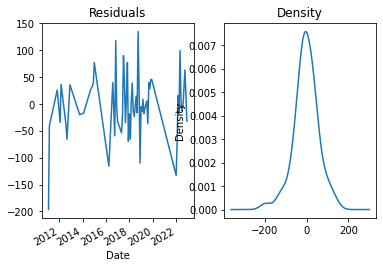

In [16]:
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

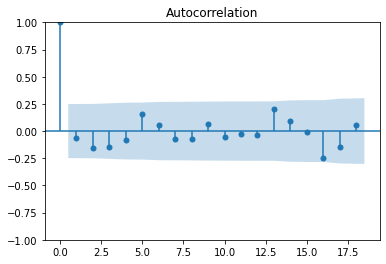

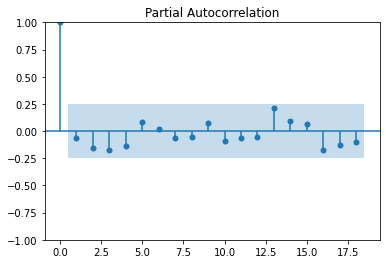

In [17]:
acf_res = plot_acf(residuals)

pacf_res = plot_pacf(residuals)

In [18]:
pred_start_date=validation_grouped.index[0]
pred_end_date=validation_grouped.index[-1]
print(pred_start_date, pred_end_date)

2022-01-01 00:00:00 2022-12-01 00:00:00


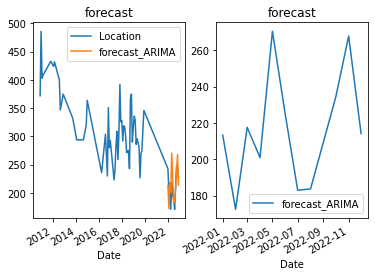

<Figure size 720x720 with 0 Axes>

In [19]:
forecast_test = model_fit.predict(start=pred_start_date, end=pred_end_date)
validation_grouped['forecast_ARIMA'] = validation_grouped['Location'] - forecast_test

fig1, ax1 = plt.subplots(1,2)
training_grouped[['Location']].plot(title='Original', ax=ax1[0])
validation_grouped[['forecast_ARIMA']].plot(title='forecast', ax=ax1[0])
validation_grouped[['forecast_ARIMA']].plot(title='forecast', ax=ax1[1])
plt.figure(figsize=(10,10))
plt.show()

<AxesSubplot: xlabel='Date'>

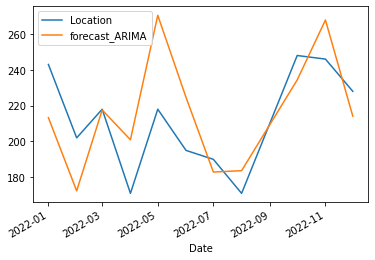

In [20]:
validation_grouped[['Location','forecast_ARIMA']].plot()

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

train, test = training_grouped['Location'], validation_grouped['Location']
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
 model = ARIMA(history, order=(3,1,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)
print('Test MSE: %.3f' % mse)

predicted=218.248863, expected=243.000000
predicted=240.596620, expected=202.000000
predicted=223.657112, expected=218.000000
predicted=217.089355, expected=171.000000
predicted=201.091844, expected=218.000000
predicted=201.517164, expected=195.000000
predicted=206.495693, expected=190.000000
predicted=187.348236, expected=171.000000
predicted=187.893526, expected=248.000000
predicted=213.121172, expected=246.000000
predicted=231.311475, expected=228.000000
Test RMSE: 29.895
Test MAE: 24.333
Test MSE: 893.732


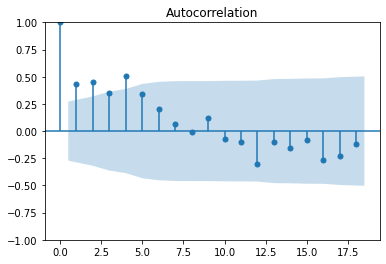

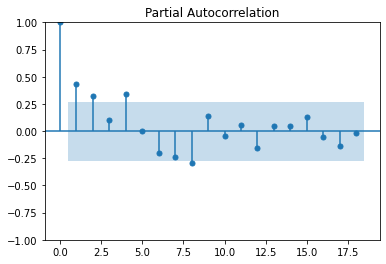

In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

training_grouped['12 Difference']=training_grouped['Location']-training_grouped['Location'].shift(12)

acf12 = plot_acf(training_grouped["12 Difference"].dropna())
pacf12 = plot_pacf(training_grouped["12 Difference"].dropna())

In [23]:
model_SARIMA=SARIMAX(training_grouped['12 Difference'],order=(2,0,4),seasonal_order=(0,1,0,12))
model_SARIMA_fit=model_SARIMA.fit()
pred_Sarima=model_SARIMA_fit.predict(start=pred_start_date,end=pred_end_date)
validation_grouped['forecast_SARIMAX'] = validation_grouped['Location'] - pred_Sarima

c:\Users\Rafi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\Rafi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\Rafi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



<AxesSubplot: ylabel='Density'>

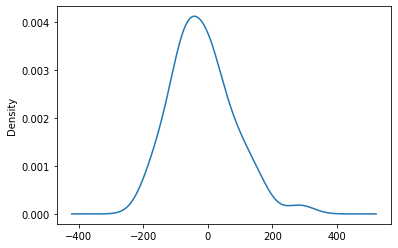

In [24]:
model_SARIMA_fit.resid.plot(kind='kde')

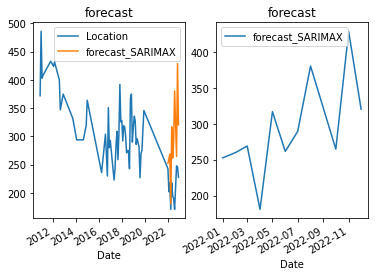

<Figure size 720x720 with 0 Axes>

In [25]:
fig12, ax12 = plt.subplots(1,2)
training_grouped[['Location']].plot(title='Original', ax=ax12[0])
validation_grouped[['forecast_SARIMAX']].plot(title='forecast', ax=ax12[0])
validation_grouped[['forecast_SARIMAX']].plot(title='forecast', ax=ax12[1])
plt.figure(figsize=(10,10))
plt.show()

<AxesSubplot: xlabel='Date'>

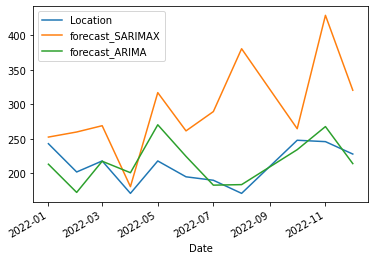

In [26]:
validation_grouped[['Location','forecast_SARIMAX', 'forecast_ARIMA']].plot()

In [27]:
train, test = training_grouped['Location'], validation_grouped['Location']
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
 model = SARIMAX(history, order=(2,0,4),seasonal_order=(0,1,0,12))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)
print('Test MSE: %.3f' % mse)

predicted=366.384925, expected=243.000000
predicted=229.588204, expected=202.000000
predicted=181.924012, expected=218.000000
predicted=183.956700, expected=171.000000
predicted=109.486017, expected=218.000000
predicted=189.691651, expected=195.000000
predicted=188.740439, expected=190.000000
predicted=172.291586, expected=171.000000
predicted=207.615704, expected=248.000000
predicted=256.903274, expected=246.000000
predicted=275.807136, expected=228.000000
Test RMSE: 55.018
Test MAE: 37.770
Test MSE: 3026.938


In [28]:
burglary_data_grouped = burglary_data.groupby(['Year', 'Month']).count()
burglary_data_grouped.reset_index(inplace=True)
fig_mult = px.line(burglary_data_grouped, x='Month', y='Location', color='Year',
                   title="Seasonal Plot: Burglary Cases Growth")
fig_mult.update_yaxes(title="Number of Cases")
fig_mult.update_traces(mode="markers+lines", hovertemplate=None)
fig_mult.update_layout(hovermode="x unified")

fig_mult.show()

In [29]:
import pmdarima as pm
auto_arima = pm.auto_arima(df_train_diff[['Location']], stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(0, 0, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [30]:
auto_arima.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   63
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -329.276
Date:                Tue, 20 Jun 2023   AIC                            662.552
Time:                        12:04:39   BIC                            666.839
Sample:                             0   HQIC                           664.238
                                 - 63                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5503      0.113     -4.871      0.000      -0.772      -0.329
sigma2      2017.5840    370.854      5.440      0.000    1290.724    2744.444
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.62
Prob(Q):                              0.93   Prob(JB):                         0.27
Heteroskedasticity (H):               0.62   Skew:                             0.49
Prob(H) (two-sided):                  0.28   Kurtosis:                         3.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

c:\Users\Rafi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

c:\Users\Rafi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



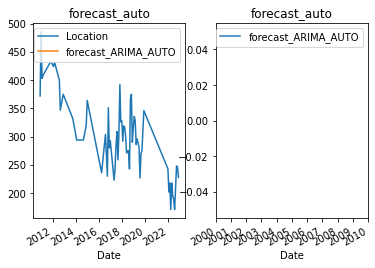

<Figure size 720x720 with 0 Axes>

In [31]:
forecast_test_auto = auto_arima.predict(start=pred_start_date, end=pred_end_date)
validation_grouped['forecast_ARIMA_AUTO'] = validation_grouped['Location'] - forecast_test_auto

fig2, ax2 = plt.subplots(1,2)
training_grouped[['Location']].plot(title='Original', ax=ax2[0])
validation_grouped[['forecast_ARIMA_AUTO']].plot(title='forecast_auto', ax=ax2[0])
validation_grouped[['forecast_ARIMA_AUTO']].plot(title='forecast_auto', ax=ax2[1])
plt.figure(figsize=(10,10))
plt.show()

<AxesSubplot: xlabel='Date'>

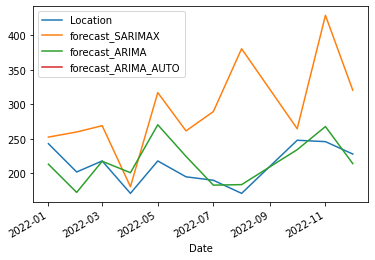

In [32]:
validation_grouped[['Location','forecast_SARIMAX', 'forecast_ARIMA', 'forecast_ARIMA_AUTO']].plot()

In [34]:
xls = pd.ExcelFile(r'.\\Datasets\\Police Workforce\\open-data-table-police-workforce-270722.ods')

# Now you can list all sheets in the file
xls.sheet_names

pwf = pd.read_excel(r'.\\Datasets\\Police Workforce\\open-data-table-police-workforce-270722.ods', sheet_name='Data')
pwf.head()


,As at 31 March...,Geo code,Force Name,Region,Sex,Rank description,Worker type,Total (headcount),Total (FTE)
0,2007,E23000036,Avon & Somerset,South West,Female,Chief Inspector,Police Officer,7,6.60
1,2007,E23000036,Avon & Somerset,South West,Female,Chief Officer,Police Officer,1,1.00
2,2007,E23000036,Avon & Somerset,South West,Female,Chief Superintendent,Police Officer,4,4.00
3,2007,E23000036,Avon & Somerset,South West,Female,Community Support Officer,Police Community Support Officer,170,164.99
4,2007,E23000036,Avon & Somerset,South West,Female,Constable,Police Officer,722,672.76


In [35]:
pwf_data_all_years = pwf.loc[(pwf['Force Name']=='Metropolitan Police') & (pwf['Total (headcount)'] != 0) & (pwf['As at 31 March...'] >= 2010)]
pwf_data_all_years = pwf_data_all_years.rename(columns={'As at 31 March...':'Year'})
pwf_data_all_years = pwf_data_all_years.fillna(0)
pwf_data_all_years['Total (FTE)'] = pwf_data_all_years['Total (FTE)'].astype(int)
pwf_data_all_years.head(100)

,Year,Geo code,Force Name,Region,Sex,Rank description,Worker type,Total (headcount),Total (FTE)
4710,2010,E23000001,Metropolitan Police,London,Female,Chief Inspector,Police Officer,55,54
4711,2010,E23000001,Metropolitan Police,London,Female,Chief Officer,Police Officer,6,6
4712,2010,E23000001,Metropolitan Police,London,Female,Chief Superintendent,Police Officer,7,7
4713,2010,E23000001,Metropolitan Police,London,Female,Community Support Officer,Police Community Support Officer,1658,1613
4714,2010,E23000001,Metropolitan Police,London,Female,Constable,Police Officer,6873,6514
...,...,...,...,...,...,...,...,...,...
10001,2014,E23000001,Metropolitan Police,London,Female,Police Staff,Police Staff,6978,6435
10002,2014,E23000001,Metropolitan Police,London,Female,Sergeant,Police Officer,868,811
10003,2014,E23000001,Metropolitan Police,London,Female,Special Constable,Special Constable,1477,0
10004,2014,E23000001,Metropolitan Police,London,Female,Superintendent,Police Officer,15,15


In [36]:
total = []
for y in pwf_data_all_years['Year'].unique():
    df_temp = pwf_data_all_years[pwf_data_all_years['Year']==y]
    total.append([y, df_temp['Total (FTE)'].sum()])

# Create the pandas DataFrame
dfwf = pd.DataFrame(total, columns=['Year', 'Police Workforce'])
  
# print dataframe.
dfwf

,Year,Police Workforce
0,2010,52509
1,2011,50572
2,2012,48179
3,2013,46121
4,2014,45010
5,2015,45564
6,2016,43909
7,2017,41868
8,2018,40321
9,2019,40791


In [37]:
# burglary_data_grouped = burglary_data.groupby(['Year', 'Month']).count()
burglary_data_grouped['Police Workforce'] = dfwf['Police Workforce']
burglary_data_grouped.head()
# print(len(burglary_data_grouped) == len(dfwf))

,Year,Month,Crime ID,Date,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Police Workforce
0,2010,12,0,372,372,372,372,372,372,372,372,372,0,52509.0
1,2011,1,0,486,486,486,486,486,486,486,486,486,0,50572.0
2,2011,2,0,403,403,403,403,403,403,403,403,403,0,48179.0
3,2011,3,0,408,408,408,408,408,408,408,408,408,0,46121.0
4,2011,11,0,433,433,433,433,433,433,433,433,433,0,45010.0


In [38]:
import xlwings as xw

workbook = xw.Book(r'.\\Datasets\\Population\\land-area-population-density-london.xlsx')
ward_sheet = workbook.sheets['Ward']
years = [x for x in range(2010, 2024)]
results = []
for year in years:
    ward_sheet.range('E1').value = year
    ward_sheet.api.Range("A2:K628").AutoFilter(Field:=3, Criteria1:="Barnet")
    results.append(
        {
            'Codes': ward_sheet.range('A21:A41').value,
            'Ward': ward_sheet.range('B21:B41').value,
            'Borough': ward_sheet.range('C21:C41').value,
            'Population': ward_sheet.range('D21:D41').value,
            'Year': [year]*21,
            'Hectares': ward_sheet.range('E21:E41').value,
            'Square Kilometres': ward_sheet.range('F21:F41').value,
            'Population per hectare': ward_sheet.range('G21:G41').value,	
            'Population per square kilometre': ward_sheet.range('H21:H41').value,
            'Census population (2011)': ward_sheet.range('J21:J41').value,	
            'Population per hectare': ward_sheet.range('K21:K41').value,
        }
    )

concat_pd = []
for i in range(len(results)):
    temp_df = pd.DataFrame(results[i])
    concat_pd.append(temp_df)
population_ward_df = pd.concat(concat_pd, ignore_index=True)
population_ward_df.head(-1)

,Codes,Ward,Borough,Population,Year,Hectares,Square Kilometres,Population per hectare,Population per square kilometre,Census population (2011)
0,E05000043,Brunswick Park,Barnet,None,2010,317.4,3.174,51.650914,None,16394.0
1,E05000044,Burnt Oak,Barnet,None,2010,206.4,2.064,88.260659,None,18217.0
2,E05000045,Childs Hill,Barnet,None,2010,308.9,3.089,64.904500,None,20049.0
3,E05000046,Colindale,Barnet,None,2010,264.2,2.642,64.716124,None,17098.0
4,E05000047,Coppetts,Barnet,None,2010,272.0,2.720,63.419118,None,17250.0
...,...,...,...,...,...,...,...,...,...,...
288,E05000058,Oakleigh,Barnet,17043.0,2023,331.7,3.317,47.666566,5138.076575,15811.0
289,E05000059,Totteridge,Barnet,17880.0,2023,876.8,8.768,17.289005,2039.233577,15159.0
290,E05000060,Underhill,Barnet,16595.0,2023,455.2,4.552,34.962654,3645.650264,15915.0
291,E05000061,West Finchley,Barnet,17743.0,2023,216.1,2.161,76.506247,8210.550671,16533.0


In [39]:
population_ward_df.loc[population_ward_df['Ward']=="Edgware"]

,Codes,Ward,Borough,Population,Year,Hectares,Square Kilometres,Population per hectare,Population per square kilometre,Census population (2011)
7,E05000050,Edgware,Barnet,None,2010,556.0,5.56,30.086331,None,16728.0
28,E05000050,Edgware,Barnet,16787.0,2011,556.0,5.56,30.086331,3019.244604,16728.0
49,E05000050,Edgware,Barnet,17299.0,2012,556.0,5.56,30.086331,3111.330935,16728.0
70,E05000050,Edgware,Barnet,17627.0,2013,556.0,5.56,30.086331,3170.323741,16728.0
91,E05000050,Edgware,Barnet,18175.0,2014,556.0,5.56,30.086331,3268.884892,16728.0
112,E05000050,Edgware,Barnet,18633.0,2015,556.0,5.56,30.086331,3351.258993,16728.0
133,E05000050,Edgware,Barnet,19706.0,2016,556.0,5.56,30.086331,3544.244604,16728.0
154,E05000050,Edgware,Barnet,20021.0,2017,556.0,5.56,30.086331,3600.899281,16728.0
175,E05000050,Edgware,Barnet,20359.0,2018,556.0,5.56,30.086331,3661.690647,16728.0
196,E05000050,Edgware,Barnet,20656.0,2019,556.0,5.56,30.086331,3715.107914,16728.0


In [40]:
crime_ward_df = pd.read_csv(r'.\\Datasets\\Crime History\\Ward Level Crime.csv')
crime_ward_df_grouped = crime_ward_df.groupby(['Ward', 'Year', 'Month' ], as_index=False)['Crime type'].count()
crime_ward_df_grouped.head()	

,Ward,Year,Month,Crime type
0,Barnet Vale,2010,12,21
1,Barnet Vale,2011,1,31
2,Barnet Vale,2011,2,29
3,Barnet Vale,2011,3,27
4,Barnet Vale,2011,11,28


In [41]:
fig_ward = px.line(crime_ward_df.groupby(['Ward', 'Year']).size().reset_index(name='Burglary Rate'), x='Year', y='Burglary Rate', color='Ward',
                   title="Seasonal Plot: Ward Burglary Cases Growth")
fig_ward.update_yaxes(title="Number of Cases")
fig_ward.update_traces(mode="markers+lines", hovertemplate=None)
fig_ward.update_layout(hovermode="x unified")

fig_ward.show()

In [42]:
df2 = pd.merge(crime_ward_df.groupby(['Date', 'Ward', 'Year', 'Reported by', 'Falls within', 'Crime type']).size().reset_index(name='Burglary Rate'), population_ward_df, how='inner', on=['Year', 'Ward'])

df3 = pd.merge(df2, dfwf, how='inner', on='Year')
df3.head()

,Date,Ward,Year,Reported by,Falls within,Crime type,Burglary Rate,Codes,Borough,Population,Hectares,Square Kilometres,Population per hectare,Population per square kilometre,Census population (2011),Police Workforce
0,2010-12-01,Brunswick Park,2010,Metropolitan Police Service,Metropolitan Police Service,Burglary,19,E05000043,Barnet,None,317.4,3.174,51.650914,None,16394.0,52509
1,2010-12-01,Burnt Oak,2010,Metropolitan Police Service,Metropolitan Police Service,Burglary,13,E05000044,Barnet,None,206.4,2.064,88.260659,None,18217.0,52509
2,2010-12-01,Childs Hill,2010,Metropolitan Police Service,Metropolitan Police Service,Burglary,30,E05000045,Barnet,None,308.9,3.089,64.904500,None,20049.0,52509
3,2010-12-01,East Barnet,2010,Metropolitan Police Service,Metropolitan Police Service,Burglary,12,E05000048,Barnet,None,375.2,3.752,43.009062,None,16137.0,52509
4,2010-12-01,East Finchley,2010,Metropolitan Police Service,Metropolitan Police Service,Burglary,32,E05000049,Barnet,None,252.4,2.524,63.347861,None,15989.0,52509


In [43]:
income_ward_df = pd.read_csv(r'.\\Datasets\\Population\\modelled-household-income-estimates-wards.csv', encoding='latin1')
income_ward_df = income_ward_df.loc[(income_ward_df['Borough']=='Barnet')]
tomelt = [income_ward_df.columns[i] for i in range(0, 4)]
income_ward_df = pd.melt(income_ward_df, id_vars=tomelt, 
        var_name="Date", 
        value_name="Mean Income (£)")
temp_df = income_ward_df[income_ward_df['Date'].str.contains("Median")]
temp_df = temp_df.rename(columns={'Mean Income (£)':'Median Income (£)'})
income_ward_df = income_ward_df[income_ward_df['Date'].str.contains("Mean")]
income_ward_df = pd.concat([income_ward_df.reset_index(drop=True), temp_df[['Median Income (£)']].reset_index(drop=True)], axis=1)
income_ward_df[income_ward_df.columns[5:]] = income_ward_df[income_ward_df.columns[5:]].replace('[\£,]', '', regex=True).astype(float)
income_ward_df['Year'] = income_ward_df.Date.str[5:9]
income_ward_df = income_ward_df.drop(['Date'], axis=1)
income_ward_df['Year']  = income_ward_df['Year'].astype('Int64')
income_ward_df = income_ward_df.rename({'Code' : 'Codes', 'Ward name' : 'Ward'}, axis=1)
income_ward_df

,Codes,Ward,LAD code,Borough,Mean Income (£),Median Income (£),Year
0,E05000043,Brunswick Park,E09000003,Barnet,37840.0,28580.0,2001
1,E05000044,Burnt Oak,E09000003,Barnet,26640.0,20460.0,2001
2,E05000045,Childs Hill,E09000003,Barnet,38500.0,29020.0,2001
3,E05000046,Colindale,E09000003,Barnet,27820.0,21380.0,2001
4,E05000047,Coppetts,E09000003,Barnet,36930.0,27960.0,2001
...,...,...,...,...,...,...,...
247,E05000059,Totteridge,E09000003,Barnet,63320.0,46150.0,2012
248,E05000060,Underhill,E09000003,Barnet,49390.0,37040.0,2012
249,E05000061,West Finchley,E09000003,Barnet,56850.0,42050.0,2012
250,E05000062,West Hendon,E09000003,Barnet,46620.0,35090.0,2012


In [44]:
df4 = df3.merge(income_ward_df[income_ward_df['Year']>=2011], how='left', left_on=['Year', 'Ward', 'Codes', 'Borough'], right_on=['Year', 'Ward', 'Codes', 'Borough'])
wardinter = {}
wardinter1 = {}
for ward in df4['Ward'].unique():
    wardinter[ward] = df4[df4['Ward']==ward]['Mean Income (£)'].interpolate('spline', order=1)
    wardinter1[ward] = df4[df4['Ward']==ward]['Median Income (£)'].interpolate('spline', order=1)
    df4.loc[df4['Ward']==ward, 'Mean Income (£)'] = wardinter[ward]
    df4.loc[df4['Ward']==ward, 'Median Income (£)'] = wardinter1[ward]
df4.head(-1)


,Date,Ward,Year,Reported by,Falls within,Crime type,Burglary Rate,Codes,Borough,Population,Hectares,Square Kilometres,Population per hectare,Population per square kilometre,Census population (2011),Police Workforce,LAD code,Mean Income (£),Median Income (£)
0,2010-12-01,Brunswick Park,2010,Metropolitan Police Service,Metropolitan Police Service,Burglary,19,E05000043,Barnet,None,317.4,3.174,51.650914,None,16394.0,52509,NaN,NaN,NaN
1,2010-12-01,Burnt Oak,2010,Metropolitan Police Service,Metropolitan Police Service,Burglary,13,E05000044,Barnet,None,206.4,2.064,88.260659,None,18217.0,52509,NaN,NaN,NaN
2,2010-12-01,Childs Hill,2010,Metropolitan Police Service,Metropolitan Police Service,Burglary,30,E05000045,Barnet,None,308.9,3.089,64.904500,None,20049.0,52509,NaN,NaN,NaN
3,2010-12-01,East Barnet,2010,Metropolitan Police Service,Metropolitan Police Service,Burglary,12,E05000048,Barnet,None,375.2,3.752,43.009062,None,16137.0,52509,NaN,NaN,NaN
4,2010-12-01,East Finchley,2010,Metropolitan Police Service,Metropolitan Police Service,Burglary,32,E05000049,Barnet,None,252.4,2.524,63.347861,None,15989.0,52509,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,2022-06-01,Woodhouse,2022,Metropolitan Police Service,Metropolitan Police Service,Burglary,6,E05000063,Barnet,18844.0,261.2,2.612,67.285605,7214.3951,17575.0,45138,NaN,51469.654200,38670.252100
950,2022-07-01,Woodhouse,2022,Metropolitan Police Service,Metropolitan Police Service,Burglary,3,E05000063,Barnet,18844.0,261.2,2.612,67.285605,7214.3951,17575.0,45138,NaN,51470.115143,38670.813544
951,2022-08-01,Woodhouse,2022,Metropolitan Police Service,Metropolitan Police Service,Burglary,1,E05000063,Barnet,18844.0,261.2,2.612,67.285605,7214.3951,17575.0,45138,NaN,51470.576086,38671.374988
952,2022-10-01,Woodhouse,2022,Metropolitan Police Service,Metropolitan Police Service,Burglary,4,E05000063,Barnet,18844.0,261.2,2.612,67.285605,7214.3951,17575.0,45138,NaN,51471.037028,38671.936432


In [45]:
fig_income = px.line(df4, x='Year', y='Mean Income (£)', color='Ward',
                   title="Seasonal Plot: Ward Burglary Cases Growth")
fig_income.update_yaxes(title="Mean Income (£)")
fig_income.update_traces(mode="markers+lines", hovertemplate=None)
fig_income.update_layout(hovermode="x unified")

fig_income.show()

In [46]:
Real_df = df4.loc[(df4['Year'] <= 2012)]
fig_pcp = go.Figure(data=
    go.Parcoords(
        line = dict(colorscale = 'Electric',
                   showscale = True),
        dimensions = list([
            dict(
                 label = "Year", values = Real_df['Year']),
            dict(range = [0,40000],
                 label = 'Population per Ward', values = Real_df['Population']),
            dict(range = [0,80000],
                 visible = True,
                 label = 'Mean Income', values = Real_df['Mean Income (£)']),
            dict(range = [0,80000],
                 label = 'Police Workforce', values = Real_df['Police Workforce']),
            dict(range = [0,200],
                 ticktext = ['0','50','100','150','200'],
                 label = 'Burglary Rate per Day', values = Real_df['Burglary Rate']),
            dict(range = [0,80000],
                 label = 'Median Income', values = Real_df['Median Income (£)'])])
    )
)
fig_pcp.show()

In [47]:

filtered_df = pd.read_csv(r'.\\Datasets\\Population\\filtered_df.csv')
filtered_df = filtered_df.rename(columns={'Ward new' : 'Ward', 'Month' : 'Date'})
filtered_df_new = filtered_df.groupby(['Date', 'Ward', 'Year', 'Falls within', 'Month num']).size().reset_index(name='Burglary Rate')
# filtered_df_new = filtered_df_new.merge(dfwf, how='left', left_on=['Year'], right_on=['Year'])
# filtered_df_new = filtered_df_new.merge(population_ward_df, how='left', left_on=['Year', 'Ward'], right_on=['Year', 'Ward'])
# filtered_df_new = filtered_df_new.rename(columns={'Police Workforce_x' : "Police Workforce"})
filtered_df_new = filtered_df_new.merge(income_ward_df, how='left', left_on=['Year', 'Ward'], right_on=['Year', 'Ward'])
# filtered_df_new = filtered_df_new.drop([ 'Codes_y',  'Borough_y', 'Borough_x', 'Codes_x'], axis=1)
filtered_df_new = filtered_df_new.fillna(value=np.nan)


print(filtered_df.columns)
# filtered_df_new.to_csv(r'.\\Datasets\\Population\\filtered_df_utility_cols.csv', index=False)

filtered_df_new

Index(['Date', 'Reported by', 'Falls within', 'Longitude', 'Latitude',
       'Location', 'LSOA code', 'LSOA name', 'Crime type', 'Month num', 'Year',
       'Month name', 'Ward'],
      dtype='object')


,Date,Ward,Year,Falls within,Month num,Burglary Rate,Codes,LAD code,Borough,Mean Income (£),Median Income (£)
0,2010-12,Brunswick Park,2010,Metropolitan Police Service,12,13,E05000043,E09000003,Barnet,50690.0,37370.0
1,2010-12,Burnt Oak,2010,Metropolitan Police Service,12,11,E05000044,E09000003,Barnet,36700.0,27410.0
2,2010-12,Childs Hill,2010,Metropolitan Police Service,12,10,E05000045,E09000003,Barnet,49750.0,36750.0
3,2010-12,Colindale North,2010,Metropolitan Police Service,12,19,NaN,NaN,NaN,NaN,NaN
4,2010-12,Colindale South,2010,Metropolitan Police Service,12,9,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3456,2023-03,Underhill,2023,Metropolitan Police Service,3,12,NaN,NaN,NaN,NaN,NaN
3457,2023-03,West Finchley,2023,Metropolitan Police Service,3,2,NaN,NaN,NaN,NaN,NaN
3458,2023-03,West Hendon,2023,Metropolitan Police Service,3,13,NaN,NaN,NaN,NaN,NaN
3459,2023-03,Whetstone,2023,Metropolitan Police Service,3,8,NaN,NaN,NaN,NaN,NaN


In [48]:
fig_w = px.line(filtered_df_new.groupby(['Ward', 'Year']).size().reset_index(name='Burglary Rate'), x='Year', y='Burglary Rate', color='Ward',
                   title="Seasonal Plot: Ward Burglary Cases Growth")
fig_w.update_yaxes(title="Number of Cases")
fig_w.update_traces(mode="markers+lines", hovertemplate=None)
fig_w.update_layout(hovermode="x unified")

fig_w.show()

In [49]:
Real_df_1 = filtered_df_new.loc[(filtered_df_new['Year'] <= 2012)]
Real_df_1 = Real_df_1.dropna()
fig_pcp_1 = go.Figure(data=
    go.Parcoords(
        line = dict(colorscale = 'Electric',
                   showscale = True),
        dimensions = list([
            dict(
                 label = "Year", values = Real_df_1['Year']),
            dict(range = [0,80000],
                 visible = True,
                 label = 'Mean Income', values = Real_df_1['Mean Income (£)']),
            dict(range = [0,200],
                 ticktext = ['0','50','100','150','200'],
                 label = 'Burglary Rate per Day', values = Real_df_1['Burglary Rate'])])
    )
)
fig_pcp_1.show()

In [50]:
out_all_years = pd.concat(all_outcome_df, ignore_index=True)
out_all_years.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type
0,6b1f92248fdd1da48149ecf656b26d697f643ca42b23a1...,2012-01,Metropolitan Police Service,Metropolitan Police Service,-0.101143,51.372665,On or near SURREY STREET,E01001042,Croydon 024B,Offender fined
1,1babcc02dce29af22b4f3650e1e6f22c83a54cfdcfa372...,2012-01,Metropolitan Police Service,Metropolitan Police Service,-0.068047,51.573901,On or near EGERTON ROAD,E01001826,Hackney 004E,Offender given community sentence
2,2a6625fb7b8ccab818be6b122f7d63b70b062e1aba09b4...,2012-01,Metropolitan Police Service,Metropolitan Police Service,0.214173,51.521207,On or near ORESTON ROAD,E01002344,Havering 029B,Offender given suspended prison sentence
3,6faae9efd06d209ecbba41705e764110ad6308ae75216e...,2012-01,Metropolitan Police Service,Metropolitan Police Service,-0.068395,51.516984,On or near Conference/Exhibition Centre,E01004309,Tower Hamlets 015D,Offender sent to prison
4,5463dff8a94e52b8c9d992b1e2cc781836640376a6bab8...,2012-01,Metropolitan Police Service,Metropolitan Police Service,0.049091,51.489739,On or near LYFORD STREET,E01001706,Greenwich 005B,Offender given community sentence
